# Neural Networks - Classification Algorithm for Balance Type According to Input Parameters
#### Libraries used:
- `Pandas`: Pandas is a library that facilitates the manipulation and analysis of structured or tabular data.
- `Matplotlib`: Matplotlib is a library for creating graphics and data visualization in general.
- `Keras`: Keras is an open-source neural network library written in Python, featuring a simple and consistent optimized interface, designed to allow rapid experimentation with deep neural networks.
- `Sklearn`: Scikit-learn is an open-source library containing tools for machine learning, such as functions for data preprocessing, model creation, results evaluation, etc.

#### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.optimizers import SGD, Nadam, Adam

#### Loading and Preprocessing Data

In [10]:
data = pd.read_csv('C:\\Users\\julia\\Documents\\GitHub\\machine-learning-uergs\\Neural Networks - Balance Scale\\balance_scale\\balance-scale.data', names=['Class', 'Left-W', 'Left-D', 'Right-W', 'Right-D'])
x = data.drop('Class', axis=1)
y = data['Class']

In [12]:
y.replace({'L': 0, 'B': 1, 'R': 2}, inplace=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Setting Hyperparameters

In [13]:
num_epochs = [10, 50]
num_hidden_layers = [1, 2]
num_neurons_per_layer = [[64], [64, 32]]
batch_size = [32, 64]

#### Cross-Validation Setup

In [14]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)

#### Defining Optimizers

In [15]:
optimizers = [SGD(momentum=0.9), Nadam(), Adam()]
val_accuracy = []

#### Building and Evaluating the Neural Network Model

In [18]:
from keras.layers import Input

for optimizer in optimizers:
  for epochs in num_epochs:
    for hidden_layers in num_hidden_layers:
        for neurons_per_layer in num_neurons_per_layer:
            for batch in batch_size:
                # Creating the neural network model.
                model = Sequential()
                model.add(Input(shape=(4,)))
                model.add(Dense(neurons_per_layer[0], activation='relu'))
                for i in range(hidden_layers - 1):
                  if i + 1 < len(neurons_per_layer):
                    model.add(Dense(neurons_per_layer[i + 1], activation='relu'))
                    model.add(Dropout(0.2))
                model.add(Dense(3, activation='softmax'))
                # Compiling the neural network model.
                model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                # Evaluating the model's performance using cross-validation.
                results = []
                for train, test in kfold.split(x_train, y_train):
                    history = model.fit(x_train.iloc[train], y_train.iloc[train], epochs=epochs, batch_size=batch, verbose=0)
                    result = model.evaluate(x_train.iloc[test], y_train.iloc[test])
                    results.append(result[1])
                    val_accuracy.append(model.evaluate(x_train.iloc[test], y_train.iloc[test])[1])
                mean_accuracy = sum(results) / len(results)
                print(f'Epochs: {epochs}, Hidden layers: {hidden_layers}, Neurons per layer: {neurons_per_layer}, Batch size: {batch}, Mean accuracy: {mean_accuracy}')
                mean_val_accuracy = sum(val_accuracy) / len(val_accuracy)
                print(f'Mean validation accuracy: {mean_val_accuracy}')
                # Evaluating the neural network model's performance using the test data.
                result = model.evaluate(x_test, y_test)
                print('Loss:', result[0])
                print('Accuracy:', result[1])


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9125 - loss: 0.3798  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9125 - loss: 0.3798 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8917 - loss: 0.3335 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8917 - loss: 0.3335
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8917 - loss: 0.3396
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8917 - loss: 0.3396 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9021 - loss: 0.2711 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9021 - loss: 0.2711 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9363 - loss: 0.2051 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9363 - loss: 0.2051 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9258 - loss: 0.1605 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9258 - loss: 0.1605 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9050 - loss: 0.2035 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9050 - loss:

#### Plotting Model Accuracy Over Epochs

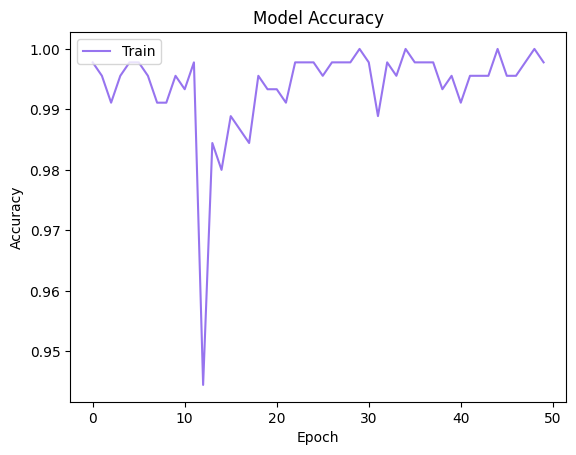

In [30]:
plt.plot(history.history['accuracy'], color='#9774EF')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()